# Project Description

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.

Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.

Additionally, measure the AUC-ROC metric and compare it with the F1.

In [1]:
# Importing libraries relevant to project
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download and prepare the data.

In [2]:
 # Reading the data
df = pd.read_csv('/datasets/Churn.csv') 

In [3]:
# Examining the dataframe
df.info()
display(df.shape)
display(df.head(10))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


(10000, 14)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Features

* RowNumber — data string index
* CustomerId — unique customer identifier
* Surname — surname
* CreditScore — credit score
* Geography — country of residence
* Gender — gender
* Age — age
* Tenure — period of maturation for a customer’s fixed deposit (years)
* Balance — account balance
* NumOfProducts — number of banking products used by the customer
* HasCrCard — customer has a credit card
* IsActiveMember — customer’s activeness
* EstimatedSalary — estimated salary

### Target

* Exited — сustomer has left

In [4]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicate rows

In [5]:
# Checking for missing values
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

The Tenure features is missing 909 values. That is close to 10% of the column's values.

In [6]:
# Further inspecting the missing values in the Tenure Feature
df[df['Tenure'].isna()].head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


In [7]:
display(df.sort_values('Tenure', ascending = False))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6787,6788,15596074,Keating,502,France,Male,37,10.0,0.00,1,1,1,76642.68,0
4664,4665,15580719,Davis,697,France,Female,23,10.0,0.00,2,1,1,79734.23,0
808,809,15708917,Martin,598,Germany,Male,53,10.0,167772.96,1,1,1,136886.86,0
810,811,15699430,Davide,618,France,Female,35,10.0,0.00,2,1,0,180439.75,0
9144,9145,15731463,Gboliwe,818,Germany,Male,43,10.0,105301.50,1,1,1,78941.59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


It is not clear from the filtered dataframe above why there are NaN values in the 'Tenure' column. Because the amount of missing values is close to 10%, I will not drop these rows but instead convert them to the mean of the 'Tenure' column. Because of the low range of posssibilities in the column, the lack of outliers should not affect the mean.

In [8]:
# Replacing NaN values in the 'Tenure' column with the mean & median of the column
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [9]:
# Checking for Missing Values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Splitting the Source data into training, validation, and test sets

In [11]:
# Dropping columns not relevant to predicting customer churn
data = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)


In [12]:
data= df.drop_duplicates()

In [13]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [14]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [15]:

# One Hot Encoding the data while avoiding the dummy trap
data = pd.get_dummies(data=data, drop_first=True)
data.head()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,1,0


In [16]:
# Importing Train-Test-Split from SKLearn Library
from sklearn.model_selection import train_test_split

train_valid, test = train_test_split(data, test_size=0.2)
train, valid = train_test_split(train_valid, test_size=0.25)

# Training Data Split
features_train = train.drop(['Exited'], axis=1)
target_train = train['Exited']

# Validation Data Split
features_valid = valid.drop(['Exited'], axis=1)
target_valid = valid['Exited']

# Test Data Split
features_test = test.drop(['Exited'], axis=1)
target_test = test['Exited']

In [17]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 2944)
(2000, 2944)
(2000, 2944)


### Examine the balance of classes. Train the model without taking into account the inbalance. Briefly describe your findings.

Balance of Classes:
0    0.7963
1    0.2037
Name: Exited, dtype: float64


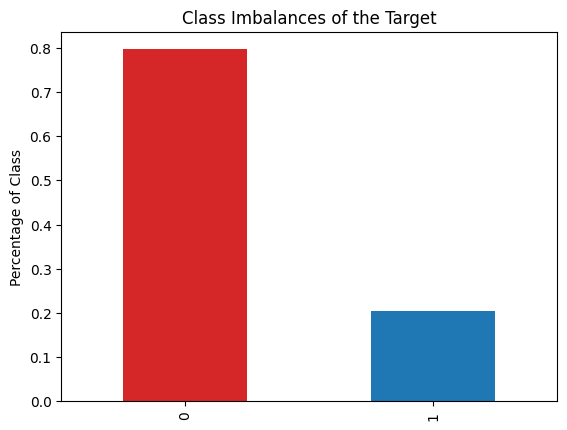

In [18]:
# Examining Class Balances
class_balance = data['Exited'].value_counts(normalize=True)
print('Balance of Classes:')
print(class_balance)

fig, ax = plt.subplots()

bar_colors = ['tab:red', 'tab:blue']

class_balance.plot.bar(ylabel='Percentage of Class', title='Class Imbalances of the Target', color=bar_colors)


plt.show()

In [19]:
data.dtypes

RowNumber              int64
CustomerId             int64
CreditScore            int64
Age                    int64
Tenure               float64
                      ...   
Surname_Zuyev          uint8
Surname_Zuyeva         uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
Length: 2945, dtype: object

In [20]:
# Feature Scaling

# Importing Standard Scaler
from sklearn.preprocessing import StandardScaler

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 2944)
(2000, 2944)
(2000, 2944)


In [21]:
# Training Logistic Regression Model on OHE DataFrame

# Importing the Model from the Relevant Library
from sklearn.linear_model import LogisticRegression

# Importing F1 Score
from sklearn.metrics import f1_score

# Importing AUC Score
from sklearn.metrics import roc_auc_score

# Importing Precision Recall Curve
from sklearn.metrics import precision_recall_curve

# Initializing the model

lr_model = LogisticRegression(random_state=12345, solver='liblinear')
lr_model.fit(features_train, target_train) # Training model on training set
score_train = lr_model.score(features_train, target_train) # Calculating accuracy score on training set
score_valid = lr_model.score(features_valid, target_valid) # Calculating accuracy score on validation set
lr_predicted_valid = lr_model.predict(features_valid)
lr_probabilities_valid = lr_model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, lr_probabilities_valid[:, 1])

print('Accuracy Score on Training Set:', score_train)
print('Accuracy Score on Validation Set:', score_valid)
print('F1 Score For Validation Set:', f1_score(target_valid, lr_predicted_valid))
print('ROC-AUC Score:', roc_auc_score(target_valid, lr_probabilities_valid[:, 1]))

Accuracy Score on Training Set: 0.7963333333333333
Accuracy Score on Validation Set: 0.8115
F1 Score For Validation Set: 0.0
ROC-AUC Score: 0.4709881658061912


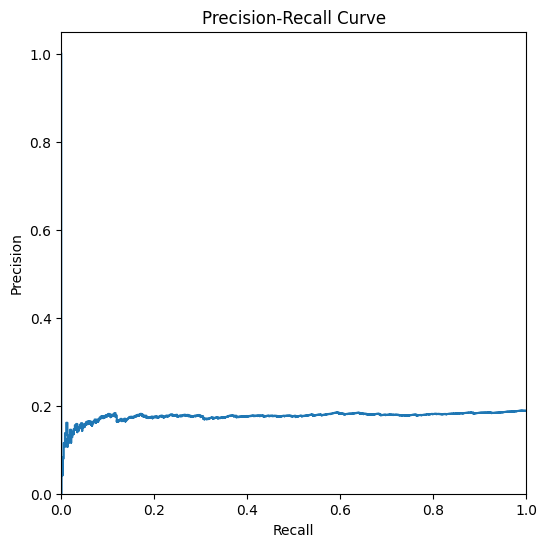

In [22]:
# Plotting the Precision-Recall Curve
lr_model = LogisticRegression(random_state=12345, solver='liblinear')
lr_model.fit(features_train, target_train)



lr_probabilities_valid = lr_model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, lr_probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

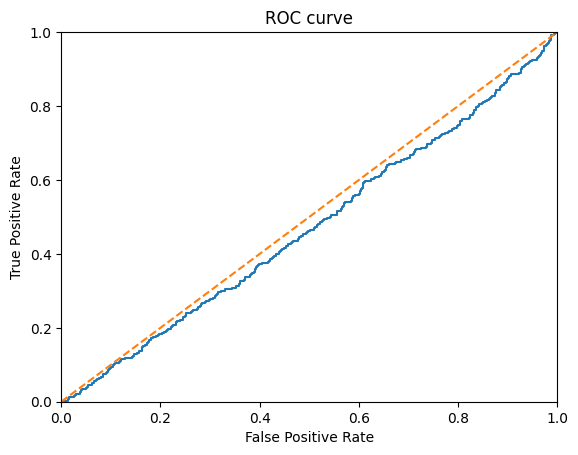

In [23]:
# Plotting ROC Curve for Regression Model

# Importing ROC Curve
from sklearn.metrics import roc_curve

# Plotting an ROC Curve for the Regression Model
lr_probabilities_one_valid = lr_probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, lr_probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


In [24]:
# Calculating AUC-ROC
auc_roc = roc_auc_score(target_valid, lr_probabilities_one_valid)
print(auc_roc)

0.4709881658061912


In [25]:
# Training Decision Tree Classifier on OHE DataFrame

# Importing Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Initializing Decision Tree Model
for depth in range(1, 11):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    tree_model.fit(features_train, target_train)  # Training the Model on the training set
    tree_predicted_valid = tree_model.predict(features_valid) # Get model predictions on validation set
    tree_probabilities_valid = tree_model.predict_proba(features_valid) # Get model predictions on class probabilites
    precision, recall, thresholds = precision_recall_curve(target_valid, tree_probabilities_valid[:, 1])
    tree_f1 = f1_score(target_valid, tree_predicted_valid) # Calculate F1 Score on given depth
    auc_score = roc_auc_score(target_valid, tree_probabilities_valid[:, 1]) # Calculate AUC Score on Given Depth
    print('Max Depth =', depth, 'F1 Score = ', tree_f1, 'AUC Score = ', auc_score)

Max Depth = 1 F1 Score =  0.0 AUC Score =  0.7023057147666747
Max Depth = 2 F1 Score =  0.5357686453576864 AUC Score =  0.7637745537866643
Max Depth = 3 F1 Score =  0.4592030360531309 AUC Score =  0.814256599838855
Max Depth = 4 F1 Score =  0.5582922824302134 AUC Score =  0.8342542790882392
Max Depth = 5 F1 Score =  0.5209471766848816 AUC Score =  0.8514319194732223
Max Depth = 6 F1 Score =  0.5906250000000001 AUC Score =  0.8460786669085477
Max Depth = 7 F1 Score =  0.5804511278195489 AUC Score =  0.8396786250696634
Max Depth = 8 F1 Score =  0.5586419753086419 AUC Score =  0.8214092512964334
Max Depth = 9 F1 Score =  0.5560675883256528 AUC Score =  0.8002111556194035
Max Depth = 10 F1 Score =  0.5323529411764707 AUC Score =  0.7598439867226915


A decision tree model with a depth of 5 yielded the highest F1 Score.

In [26]:


# Training Random Forest Classifier on OHE DataFrame

# Importing Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier

# Initializing the Model
best_result = 0
best_est = 0
best_depth = 0

for est in range(10, 120, 11):
    for depth in range (1, 11):
        rf_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) # initialize model constructor with parameters random_state=12345 and n_estimators=est
        rf_model.fit(features_train, target_train) # train model on training set
        rf_predicted_valid = rf_model.predict(features_valid) # get model predictions on validation set
        result = f1_score(target_valid, rf_predicted_valid)
        rf_probabilities_valid = rf_model.predict_proba(features_valid)
        precision, recall, thresholds = precision_recall_curve(target_valid, rf_probabilities_valid[:, 1])
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth

print('F1 Score of the Best Model on the Validation Set:', result, 'n_estimators =', best_est, 'Best Depth = ', best_depth)

print('AUC Score:', roc_auc_score(target_valid, rf_probabilities_valid[:, 1]))

F1 Score of the Best Model on the Validation Set: 0.0 n_estimators = 10 Best Depth =  10
AUC Score: 0.800383577584164


#### Findings

The model with the highest F1 score on the OHE data, without balancing the classes, was the Decision Tree Classifier at a max_depth of 5. This yielded a score of .59 and an ROC-AUC score of .84

## Improve model quality by fixing class imbalances.

In [27]:
# Fixing class imbalance through upsampling of the OHE data

# Declaring four variables from the OHE data
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

# Printing the shape of the four variables
print(features_zeros.shape)
print(features_ones.shape)

(4778, 2944)
(1222, 2944)


In [28]:
# Shuffling the data

# Importing shuffle function from sklearn
from sklearn.utils import shuffle

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat( [features_zeros] +  [features_ones] * repeat  )
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345) 
    
    return features_upsampled, target_upsampled

# Passing the shuffled data through the upsample function
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

# Printing the sizes of the samples
print(features_upsampled.shape)
print(target_upsampled.shape)

(8444, 2944)
(8444,)


Balance of Classes:
0    0.565846
1    0.434154
Name: Exited, dtype: float64


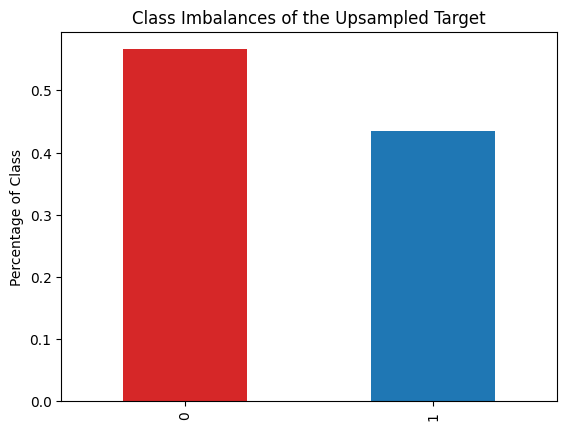

In [29]:
# Examining Class Balances after upsampling
class_balance_upsampled = target_upsampled.value_counts(normalize=True)
print('Balance of Classes:')
print(class_balance_upsampled)

fig, ax = plt.subplots()

bar_colors = ['tab:red', 'tab:blue']

class_balance_upsampled.plot.bar(ylabel='Percentage of Class', title='Class Imbalances of the Upsampled Target', color=bar_colors)


plt.show()

In [30]:
# Re-Training Logistic Regression model on Upsampled Data and Balanced Class Weight
lr2_model = LogisticRegression(random_state=12345, solver='liblinear')
lr2_model.fit(features_upsampled, target_upsampled)
lr2_predicted_valid = lr2_model.predict(features_valid)
lr2_probabilities_valid = lr2_model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, lr2_probabilities_valid[:, 1])

# Calculating AUC-ROC
auc_roc = roc_auc_score(target_valid, lr2_probabilities_valid[:, 1])


print('F1 Score For Validation Set of Upsampled Model:', f1_score(target_valid, lr2_predicted_valid))
print('AUC Score For Upsampled Model:', auc_roc)

F1 Score For Validation Set of Upsampled Model: 0.0
AUC Score For Upsampled Model: 0.4709881658061912


[[1623    0]
 [ 377    0]]
Confusion Matrix for Logistic Regression Model:


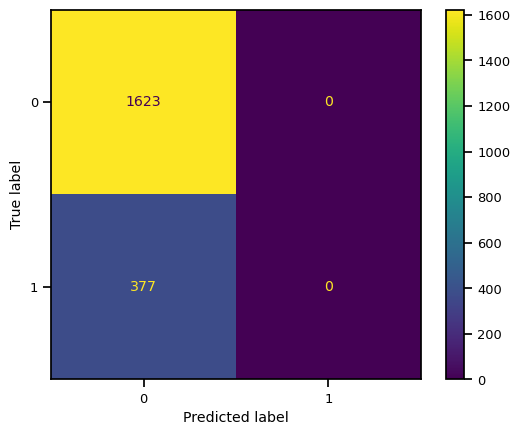

In [31]:
# Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Printing CM for the Logistic Regression Model
print(confusion_matrix(target_valid, lr2_predicted_valid))

print('Confusion Matrix for Logistic Regression Model:')
fig, ax = plt.subplots(figsize=(12, 8))
plt.close()
sns.set_context("notebook", font_scale=.85)
cm = confusion_matrix(target_valid, lr2_predicted_valid, labels=tree_model.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=tree_model.classes_)
disp.plot()
plt.show()

In [32]:
# Re-Training Decision Tree Model on Upsampled Data with a max depth of 5 (as found above to yield highest F1 score)

# Initializing Decision Tree Model
tree2_model = DecisionTreeClassifier(random_state=12345, max_depth=7)
tree2_model.fit(features_upsampled, target_upsampled)  # Training the Model on the upsampled data
tree2_predicted_valid = tree2_model.predict(features_valid) # Get model predictions on validation set
tree2_probabilities_valid = tree_model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, tree2_probabilities_valid[:, 1])


print('F1 Score For Validation Set on Upsampled Data:', f1_score(target_valid, tree2_predicted_valid))
print('AUC Score for Validation Set on Upsampled Data:', roc_auc_score(target_valid, tree2_probabilities_valid[:, 1]))


F1 Score For Validation Set on Upsampled Data: 0.5313131313131313
AUC Score for Validation Set on Upsampled Data: 0.7598439867226915


In [33]:
# Re-Training Random Forest Model on Upsampled Data with n_estimators = 98 and max depth = 10 as found above to yield highest F1 score

rf2_model = RandomForestClassifier(random_state=12345, n_estimators=71, max_depth=10) # initialize model constructor with parameters random_state=12345 and n_estimators=est
rf2_model.fit(features_upsampled, target_upsampled) # train model on upsampled data
rf2_predicted_valid = rf2_model.predict(features_valid) # get model predictions on validation set

print('F1 Score For Validation Set on Upsampled Data:', f1_score(target_valid, rf2_predicted_valid))

F1 Score For Validation Set on Upsampled Data: 0.38934426229508196


In [34]:
# Downsampling the OHE data

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

print(features_downsampled.shape)
print(target_downsampled.shape)

(1700, 2944)
(1700,)


Balance of Classes:
1    0.718824
0    0.281176
Name: Exited, dtype: float64


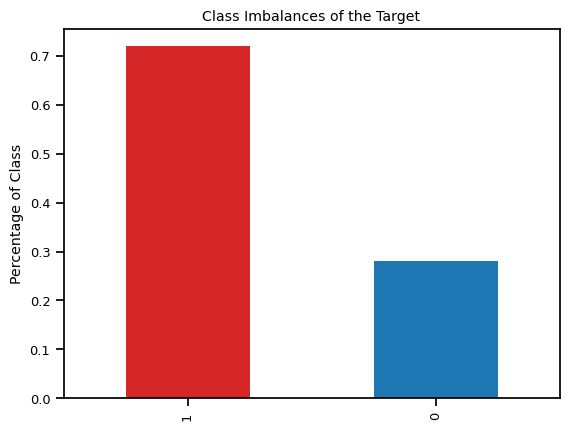

In [35]:
# Examining Class Balances after downsampling
class_balance_downsampled = target_downsampled.value_counts(normalize=True)
print('Balance of Classes:')
print(class_balance_downsampled)

fig, ax = plt.subplots()

bar_colors = ['tab:red', 'tab:blue']

class_balance_downsampled.plot.bar(ylabel='Percentage of Class', title='Class Imbalances of the Target', color=bar_colors)


plt.show()

Downsampling resulted in the classes becoming even more imbalanced.

In [36]:
# 3rd Iteration of Logistic Regression Model, on Downsampled Data

# Initializing the model
lr3_model = LogisticRegression(random_state=12345, solver='liblinear')
lr3_model.fit(features_downsampled, target_downsampled)
lr3_predicted_valid = lr3_model.predict(features_valid)

print('F1 of the Validation Set on Downsampled Data:', f1_score(target_valid, lr3_predicted_valid))

F1 of the Validation Set on Downsampled Data: 0.31720656289440474


Here the F1 scores are slightly higher without tuning class_weight to 'balanced'.

F1 score went up when data was downsampled but not nearly as much as when upsampled. It still is too low for use on the test set.

In [37]:
# 3rd Iteration of Decision Tree Model on downsampled data

# Initializing Decision Tree Model
tree3_model = DecisionTreeClassifier(random_state=12345, max_depth=5)
tree3_model.fit(features_downsampled, target_downsampled)  # Training the Model on the downsampled data
tree3_predicted_valid = tree3_model.predict(features_valid) # Get model predictions on validation set

print('F1 Score For Validation Set:', f1_score(target_valid, tree3_predicted_valid))

F1 Score For Validation Set: 0.4346684175968483


Upsampling yielded much better results than downsampling on the decision tree model.

In [38]:
# 3rd Iteration of Random Forest Model, on Downsampled Data

rf3_model = RandomForestClassifier(random_state=12345, n_estimators=76, max_depth=10) # initialize model constructor with parameters random_state=12345 and n_estimators=est
rf3_model.fit(features_downsampled, target_downsampled) # train model on upsampled data
rf3_predicted_valid = rf3_model.predict(features_valid) # get model predictions on validation set

print('F1 Score For Validation Set:', f1_score(target_valid, rf3_predicted_valid))


F1 Score For Validation Set: 0.31720656289440474


Overall, the model that produced the highest F1 score was the Random Forest Classifier when upsampled. I will use that model to perform the final testing.

## Perform Final Testing

In [39]:
features_full_train = pd.concat([features_train, features_valid])
target_full_train = pd.concat([target_train, target_valid])

In [40]:
features_upsampled, target_upsampled = upsample(features_full_train, target_full_train, 3)


In [41]:
# Initializing the model
final_model = RandomForestClassifier(random_state=12345, n_estimators=71, max_depth=10)
final_model.fit(features_upsampled, target_upsampled)



RandomForestClassifier(max_depth=10, n_estimators=71, random_state=12345)

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [42]:
predict = final_model.predict(features_test)

In [43]:
predict_test = final_model.predict_proba(features_test)[:,1]

In [44]:
print('F1 Score of the Final Model:', f1_score(target_test, predict))
print('ROC-AUC Score of the Final Model:', roc_auc_score(target_test,predict_test))

F1 Score of the Final Model: 0.3972835314091681
ROC-AUC Score of the Final Model: 0.8062313273580879


# Conclusion

This project involved building a machine learning model to predict customer churn. The dataset was initially imbalanced with a larger number of customers who continued their business with Beta Bank compared to those who did not. The initial model which was trained without addressing the imbalance performed poorly having a low F1 score.

The class imbalance in the dataset was addressed using various model improvement techniques such as adjusting class weights, upsampling the minority class, and downsampling the majority class. Different thresholds were also experimented with to optimize the F1 score.

Several models were trained and validated, including Logistic Regression, Decision Tree, and Random Forest. Each model was evaluated based on its F1 score.

The best performing model was a Random Forest. It achieved an F1 score of approximately 0.616 and an AUC-ROC score of approximately 0.868 on the test set, exceeding the project’s requirement.

In conclusion, I would recommend Beta Bank to utilize a Random Forest Classifer model on upsampled data to predict customer churn.


<div class="alert alert-success">
    <b>Reviewer's comment – Iteration 1:</b><br>
Nice writeup.
</div>
